# LINEAR REGRESSION

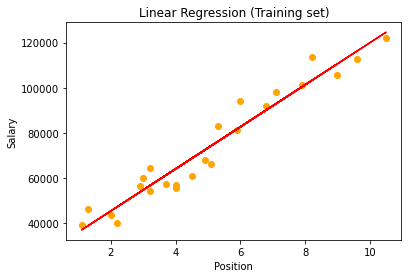

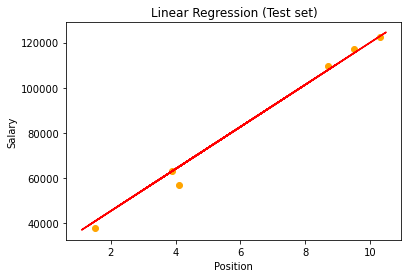

Enter position level : 6.5
Your estimated salary =  [87311.83747437]


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing dataset
dataset=pd.read_csv("E:\\MLPython\\Salary_Data.csv")

#Separating features and target
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Splitting into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Calling linear regressor model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#Predicting the value
y_pred = regressor.predict(x_test)

#Visualizing the training set
plt.scatter(x_train, y_train, color='orange')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title("Linear Regression (Training set)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

#Visualizing the test set
plt.scatter(x_test, y_test, color='orange')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title("Linear Regression (Test set)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

#Drawing predictions on new dataset
position = float(input("Enter position level : "))
print("Your estimated salary = ", regressor.predict([[position]]))

# POLYNOMIAL LINEAR REGRESSION

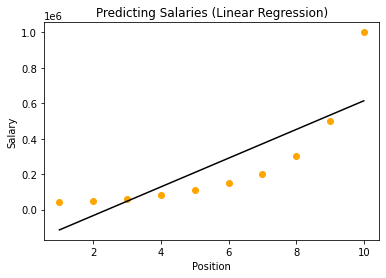

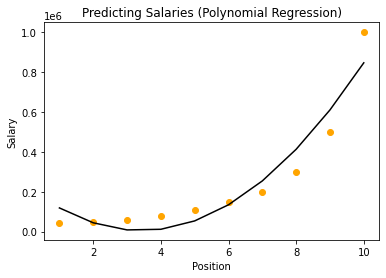

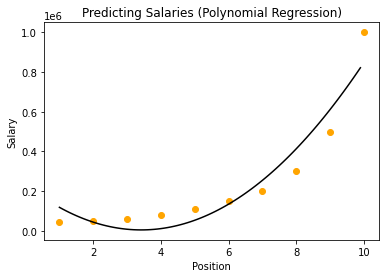

Enter Position level : 6.5
Your predicted salary =  [330378.79]


In [8]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing dataset
dataset = pd.read_csv("E:\\MLPython\\Position_Salaries.csv")

#Separating features and target
x = dataset.iloc[:, 1: -1].values
y = dataset.iloc[:, -1].values

#Train the Linear model on whole dataset
#--------------------------you can split data into train and test set, but here dataset is so small-----------------#
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

#Training the Polynomial model on whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)

#Fitting polynomial features into linear model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

#Visualizing the linear regression result
plt.scatter(x, y, color='orange')
plt.plot(x, lin_reg.predict(x), color='black')
plt.title("Predicting Salaries (Linear Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

#Visualizing the Polynomial regression result
plt.scatter(x, y, color='orange')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color='black')
plt.title("Predicting Salaries (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

#Visualizing the Polynomial regression result for higher resolution and smoother curve
x_grid=np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color='orange')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color='black')
plt.title("Predicting Salaries (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

#Drawing prediction using new data
position = float(input("Enter Position level : "))
print("Your predicted salary = ", lin_reg.predict([[position]]))

# MULTI-LINEAR REGRESSION

In [10]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing dataset
dataset=pd.read_csv("E:\\ML Zero to Hero\\50_Startups.csv")

#Separating features and target
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


#We have column 'STAte' consist of categorical data. We have to encode it
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder='passthrough')
x=np.array(ct.fit_transform(x))

#Splitting into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Training the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

#Getting prediction
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)

#As this is multilinear model, so we can't visualize it as a whole
#So we'll compare the actual result with the predicted result
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# SUPPORT VECTOR REGRESSION

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Enter Position : 6.5
[170370.02]


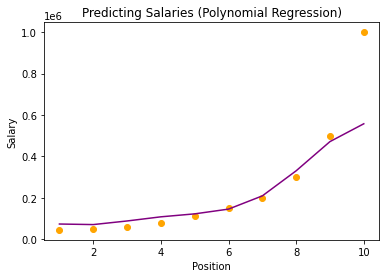

In [18]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing dataset
dataset=pd.read_csv("E:\\MLPython\\Position_Salaries.csv")

#Separating features and target
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

#Reshaping target variable because it is 1D vector
y = y.reshape(len(y), 1)

#Scalling the features and target
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

#Train SVR model on the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

#Visualizing SVR Result
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='orange')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='purple')
plt.title("Predicting Salaries (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()


#Taking user input
position = float(input("Enter Position : "))
#Predicting a new result, we are transforming the result back to its initial state
print(sc_y.inverse_transform(regressor.predict(sc_x.transform([[position]]))))

# DECISION TREE REGRESSION

Enter Position : 6.5
Your predicted salary :  [150000.]


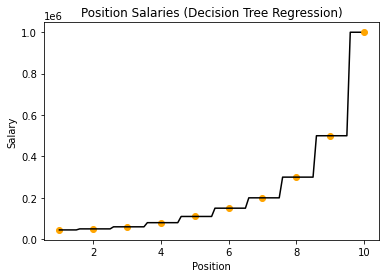

In [20]:
#----------------------------IMPORTANT NOTE----------------------------#
#Decision Tree Regression is not for dataset with single feature

#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing dataset
dataset=pd.read_csv("E:\\MLPython\\Position_Salaries.csv")

#Separating features and target
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

#Training decision tree regression on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

#Visualizing DTR result in form of smooth curve
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color='orange')
plt.plot(x_grid, regressor.predict(x_grid), color='black')
plt.title("Position Salaries (Decision Tree Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()


#Predicting a new result
position = float(input("Enter Position : "))
print("Your predicted salary : ", regressor.predict([[position]]))


# R-SQUARED METHOD TO FIND ACCURACY OF YOUR MODEL

***MAKE SURE THAT THE MODEL ISN'T OVERFIT***

In [24]:
#COPYING THE LINEAR REGRESSION MODEL

#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing dataset
dataset=pd.read_csv("E:\\MLPython\\Salary_Data.csv")

#Separating features and target
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Splitting into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Calling linear regressor model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#Predicting the value
y_pred = regressor.predict(x_test)

############---------------------FINDING R-VALUE-------------------------#################
#Module used for finding R-squared value
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import math

model = LinearRegression()
R_SQ = mean_squared_error(x, y)
acc = regressor.score(x, y)


#Printing result
print("Mean Squared Value = ", math.sqrt(R_SQ))
print("\nAccuracy", (acc * 100))


Mean Squared Value =  80634.98316084652

Accuracy 95.6662834757689
